# Pyber_Challenge
UC Berkeley Extension Data Analytics Bootcamp Challenge 5

### Add dependencies

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

### Load data

In [3]:
# Files to load
city_data_to_load = os.path.join("modulefiles","Resources","city_data.csv")
ride_data_to_load = os.path.join("modulefiles","Resources","ride_data.csv")

In [4]:
# Load data into dataframes
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge DataFrames

In [5]:
# Common column is "city"

pyber_data_df = pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])

### Create a bubble plot:
    
The average fare for each type of city on the y-axis (using Pandas mean() function on "fare" column)

The total number of rides for each type city on the x-axis (count() function on "ride_id" column)

Make the size of each marker, or bubble, correlate to the average number of drivers for each type of city (get average driver_count for each city)

### Create DataFrames for each type of city

In [6]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

### Get the number of rides for each city type

In [7]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

### Get the average fare for each city type

In [8]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

### Get the average number of drivers for each city type

In [9]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

### Create the individual bubble plots for each city type

The x-axis is the number of rides for each city.

The y-axis is the average fare for each city.

The size of each marker is the average number of drivers in each city.

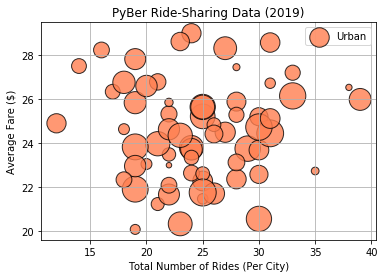

In [10]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

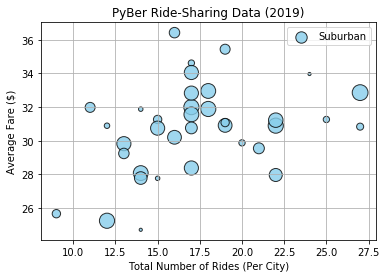

In [11]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

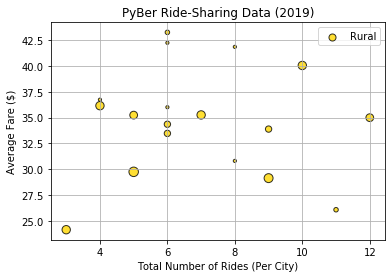

In [12]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### Create a bubble chart for all cities

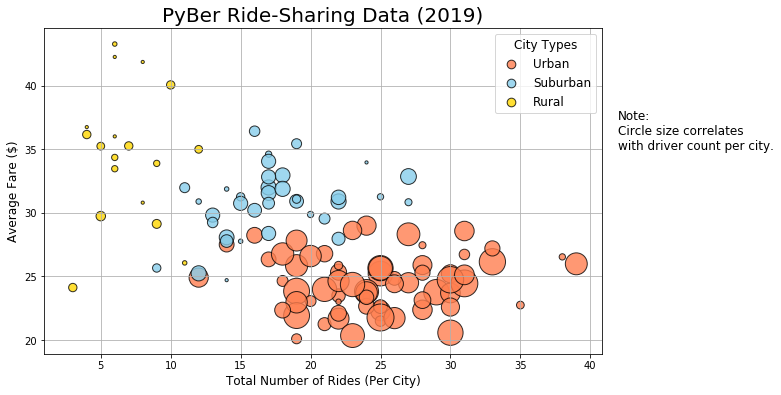

In [13]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, 
      urban_avg_fare, 
      s=10*urban_driver_count, c="coral", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
      suburban_avg_fare, 
      s=10*suburban_driver_count, c="skyblue", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
      rural_avg_fare, 
      s=10*rural_driver_count, c="gold", 
      edgecolor="black", linewidths=1, 
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/challenge/combinedfarevsrides.png")

# Show the plot
plt.show()

### Summary statistics for number of rides by city type

#### Calculate mean, median, and mode

In [14]:
# Use the describe() function for each city type

urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [15]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [16]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [17]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [18]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [19]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [20]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [21]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [22]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

#### Use NumPy and SciPy to calculate mean, median, and mode

In [23]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [24]:
# Calculate the measures of central tendency for the ride count for the urban cities.

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [25]:
# Calculate the measures of central tendency for the ride count for the suburban cities.

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [26]:
# Calculate the measures of central tendency for the ride count for the rural cities.

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for suburban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for suburban trips is 6.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([6]), count=array([5])).


### Summary statistics for the fare by city type

In [27]:
# create a series with all the fare values from the "fare" column in urban_cities_df
urban_fares = urban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [28]:
# create a series with all the fare values from the "fare" column in suburban_cities_df
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [29]:
# create a series with all the fare values from the "fare" column in rural_cities_df
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


### Summary statistics for the number of drivers by city type

In [30]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']

urban_drivers_mean = np.mean(urban_drivers)

In [31]:
# Get the driver count data from the suburban cities.
suburban_drivers = suburban_cities_df['driver_count']

suburban_drivers_mean = np.mean(suburban_drivers)

In [32]:
# Get the driver count data from the rural cities.
rural_drivers = rural_cities_df['driver_count']

rural_drivers_mean = np.mean(rural_drivers)

### Create box-and-whisker plots

#### Box-and-whisker plot for ride count data

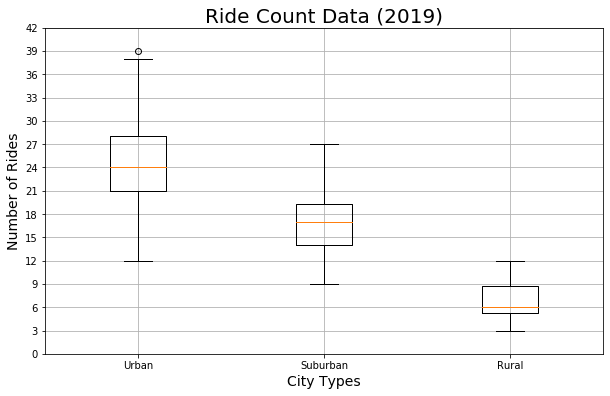

In [33]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/challenge/ridecountbw.png")
plt.show()

In [34]:
# We see there is an outlier in the urban dataset with a value of 39.
# Get the city that matches 39.


urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"The urban city of {urban_city_outlier} has the highest rider count, with 39 rides.")

The urban city of West Angela has the highest rider count, with 39 rides.


#### Box-and-whisker plot for ride fare data

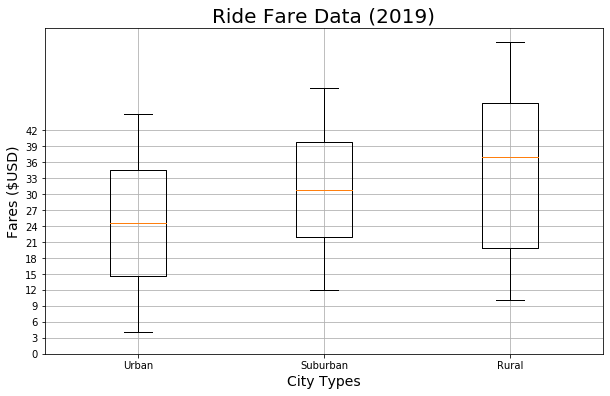

In [35]:
# Add all ride fare box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fares ($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/challenge/ridefarebw.png")
plt.show()

#### Box-and-whisker plots for driver count data

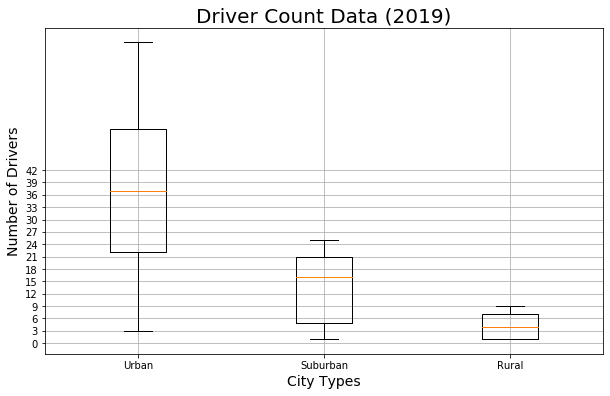

In [36]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/challenge/driverscountbw.png")
plt.show()

### Get the percentage of fares for each city type

Get the total fares for each city type.

Get the total for all the fares for all the city types.

Calculate the percentage of the total fares for each city type.

In [37]:
# calculating the percentages for each city type
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()

### Pie chart for percentage of fares by city type (using matlab approach)

Text(0.5, 1.0, '% of Total Fares by City Type')

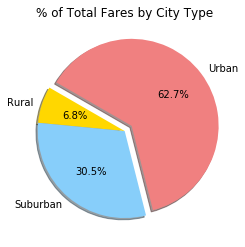

In [38]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")


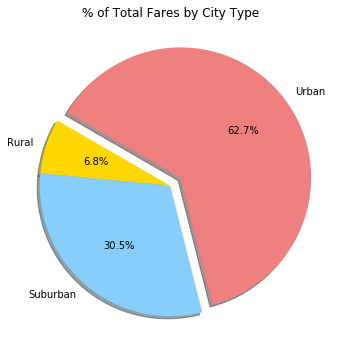

In [39]:
# change font size, using matplotlib to use rcParams

# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/challenge/farespercent.png")
# Show Figure
plt.show()

### Calculate ride percentages

In [40]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()

### Pie chart for percentage of rides by city type (using matlab approach)

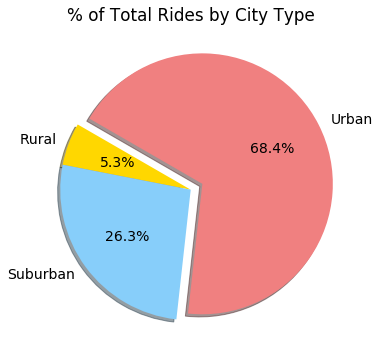

In [41]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/challenge/ridespercent.png")
# Show Figure
plt.show()

### Calculate driver percentages

In [42]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()

### Pie chart for percentage of drivers by city type (using matlab approach)

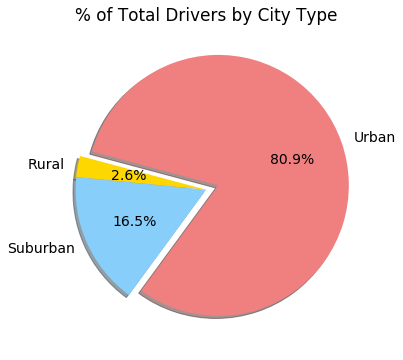

In [43]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/challenge/driverspercent.png")
# Show Figure
plt.show()

# Challenge

### Requirements:

#### Technical Analysis Deliverable 1: 
A DataFrame that summarizes the key metrics for the ride-sharing data by city type.

#### Technical Analysis Deliverable 2: 
A multiple-line chart, with one line for each city type, that shows the sum of the fares for each week.

#### Report Deliverable 3: 
A written report of your results, saved in a README.md document on your GitHub repository.

## Technical Analysis Deliverable 1:
A Summary DataFrame

In [44]:
# Create dataframe elements:

# Total Rides
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
# Total Drivers ---- need help
total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]
# Total Fares
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
# Average Fare per Ride
avg_ride_fare = total_fares / total_rides
# Average Fare per Driver
avg_driver_fare = total_fares / total_drivers

In [45]:
# try 1: get total_drivers:
# rural 78
# urban 2405
# suburban 490

total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [46]:
# try 2: get total drivers:

total_drivers = pyber_data_df.groupby(["type"]).describe()["driver_count"].iloc[:,0]

total_drivers # just returns the count, not sum of drivers

type
Rural        125.0
Suburban     625.0
Urban       1625.0
Name: count, dtype: float64

In [47]:
# Create new dataframe:

type_summary_df = pd.DataFrame({
             "Total Rides": total_rides,
             "Total Drivers": total_drivers,
             "Total Fares": total_fares,
             "Average Ride Fare": avg_ride_fare,
             "Average Driver Fare": avg_driver_fare})

In [48]:
# Format the dataframe:

type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map("${:,.2f}".format)
type_summary_df["Average Ride Fare"] = type_summary_df["Average Ride Fare"].map("${:,.2f}".format)
type_summary_df["Average Driver Fare"] = type_summary_df["Average Driver Fare"].map("${:,.2f}".format)

# remove index "type" name
type_summary_df.index.names = ['']



print("Technical Analysis Deliverable 1:")
type_summary_df

Technical Analysis Deliverable 1:


,Total Rides,Total Drivers,Total Fares,Average Ride Fare,Average Driver Fare
,,,,,
Rural,125,125.0,"$4,327.93",$34.62,$8.06
Suburban,625,625.0,"$19,356.33",$30.97,$2.26
Urban,1625,1625.0,"$39,854.38",$24.53,$0.67


## Technical Analysis Deliverable 2:
Multiple-Line Plot for the Sum of the Fares for Each City Type

In [49]:
# rename columns in pyber_data_df

pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride ID','driver_count': 'No. Drivers', 'type':'City Type'})


In [50]:
# set index to the date column

pyber_data_df = pyber_data_df.set_index('Date')

In [51]:
# create new dataframe with only Date, City Type, and Fare columns
pyber_df2 = pyber_data_df[["City Type","Fare"]].copy()


In [52]:
#make sure index is in datetime format
pyber_df2.index = pd.to_datetime(pyber_df2.index)


In [53]:
# check data types:
pyber_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [54]:
# calculate series values to be put in a dataframe

fare_info = pyber_df2.groupby(["City Type","Date"]).sum()["Fare"]


In [55]:
# Convert the groupby Series into a DataFrame.

fare_info_df = pd.DataFrame(fare_info)


In [56]:
# reset index
fare_info_df.reset_index()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [57]:
# create a pivot dataframe with the Date as the index and City Type as the columns

pivot = pd.pivot_table(fare_info_df,index=['Date'], columns=['City Type'])


In [58]:
date_pivot = pivot.loc['2019-01-01':'2019-04-28']

In [59]:
resampled_date_pivot = date_pivot.resample('W').sum()

In [60]:
# Here is the final dataframe we will be using to create the plot:

resampled_date_pivot

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

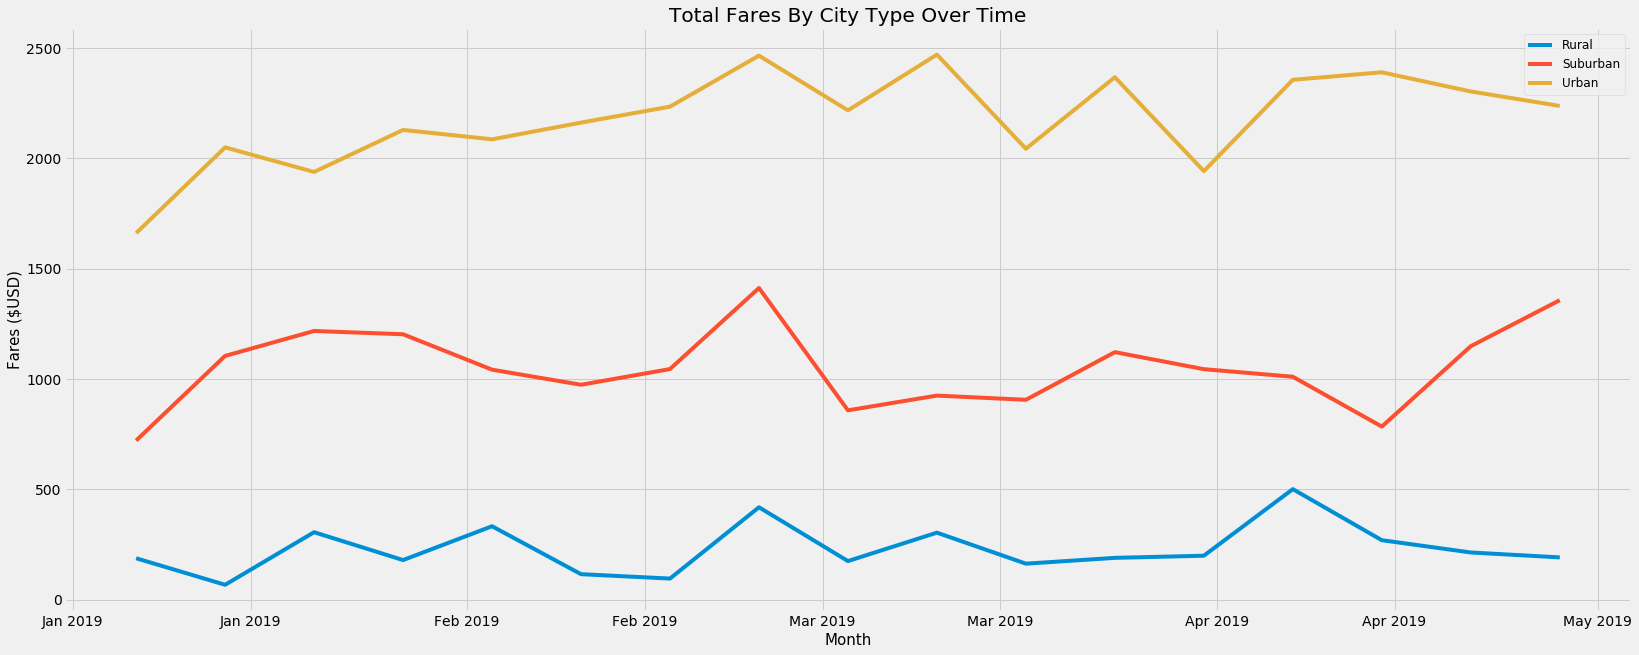

In [61]:
# Using the object-oriented interface method, plot the DataFrame you created in Step 9 using the df.plot() function. Things to consider with your plotting:
# Import the style from Matplotlib.
# Use the FiveThirtyEight (Links to an external site.) graph style.
# Add a title.
# Add x- and y-axis labels according to the final figure.
# Save the figure to the “analysis” folder.
# Make the figure size large enough so it’s not too small.

# import dependencies for matplotlib dates. Info here: https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/customize-dates-matplotlib-plots-python/
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(25,10))
ax.plot(resampled_date_pivot)


# Set the x axis labels to be months rather than full dates
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))

# Add the legend
ax.legend(('Rural','Suburban','Urban'), loc='upper right',fontsize=12)


# formatting
ax.set_ylabel('Fares ($USD)',fontsize=15)
ax.set_xlabel("Month",fontsize=15)
ax.set_title("Total Fares By City Type Over Time")

# Save the figure:
plt.savefig("analysis/challenge/fivethirtyeightplot.png")

print("Here is the final plot, showing the Total Fares ")
plt.show()